In [ ]:
!pip install pymysql #파이썬에서 mysql을 접근하기 위한 커넥터

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pymysql
import pandas as pd

conn = pymysql.connect(
    host='database-1.cm3sms0a2sag.us-east-1.rds.amazonaws.com',  # 본인 RDS 엔드포인트
    user='admin',            # 사용자명
    password='qwer1234', # 비밀번호
    database='MLproject',    # 데이터베이스명
    charset='utf8mb4'
)
query = "SELECT * FROM titanic;"
df = pd.read_sql(query, conn)
conn.close()

/tmp/ipython-input-3014221382.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S


In [ ]:
# AWS RDS에서 가져온 데이터로 머싡러닝을 학습해보자.

# X데이터 선정
X = df[['PassengerId',  'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

# 생존 분류니까 당연히 생존 컬럼을 y값으로 지정해야 한다.
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

# 학습데이터와 평가데이터 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

from sklearn.tree import DecisionTreeClassifier

# 학습 시킬 모델 정의
dtc = DecisionTreeClassifier()

# 학습
dtc.fit(X_train, y_train)

from sklearn.metrics import f1_score

#분류 평가 방법을 f1 스코어로 해야하니까 예측값을 미리 뽑아놔야 하지 않겠는가
prediction = dtc.predict(X_test)

# 예측 vs 평가 정답
f1_score(prediction, y_test)

0.5230769230769231

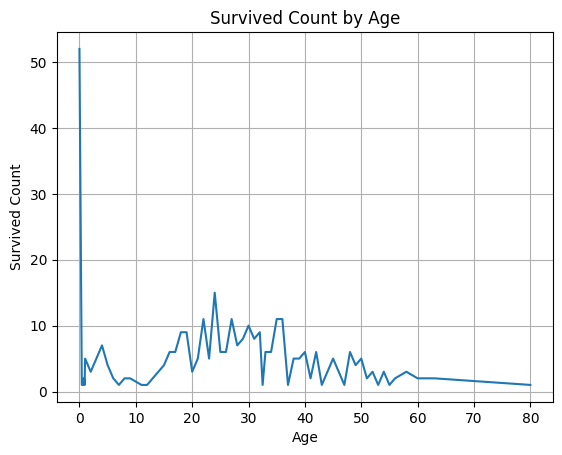

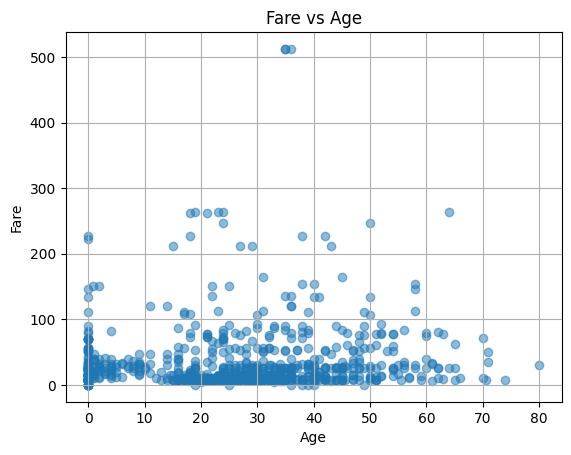

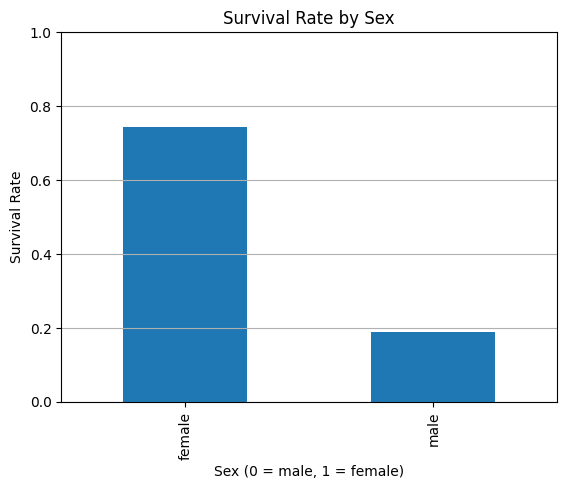

In [ ]:
import matplotlib.pyplot as plt

# 1. 꺾은선그래프 - 나이별 생존자 수 추이
age_survived = df[df['Survived'] == 1].groupby('Age').size()
plt.figure()
age_survived.plot(kind='line')
plt.xlabel("Age")
plt.ylabel("Survived Count")
plt.grid(True)
plt.show()

# 점그래프 - 운임(Fare)과 나이(Age)의 관계
plt.figure()
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

# 막대그래프- 성별 생존률
sex_survival = df.groupby('Sex')['Survived'].mean()
plt.figure()
sex_survival.plot(kind='bar')
plt.xlabel("Sex (0 = male, 1 = female)")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
